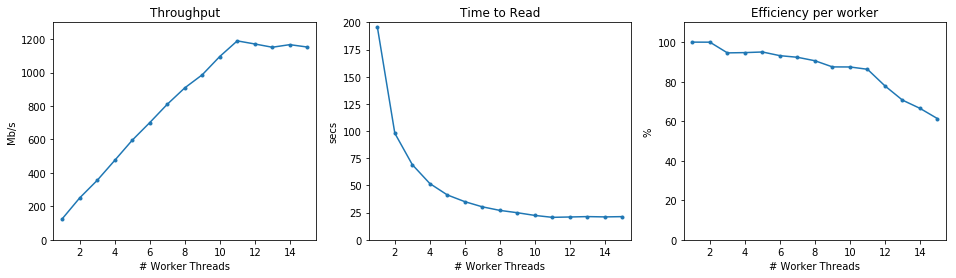

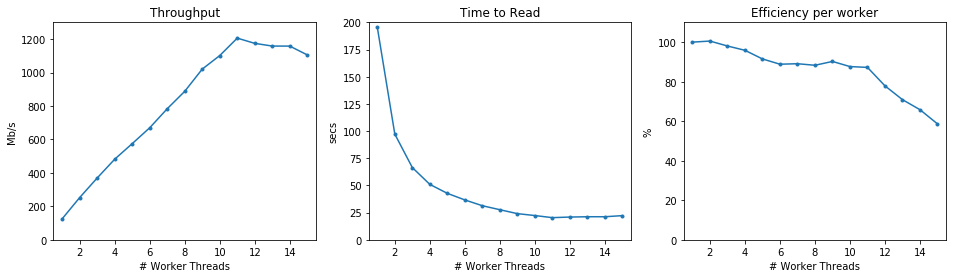

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pickle
from mpnetcdf4.benchmarking import plot_benchmark_results

stat_runs = [pickle.load(open(fname,'rb')) for fname in [
    'benchmark-result-04.pickle',
    'benchmark-result-05.pickle']]
for rr in stat_runs:
    plot_benchmark_results(rr,
                           fig=plt.figure(figsize=(16,4)),
                           max_throughput=1300,
                           max_time=200)

## Analysis

Following file was used during testing:

> `/g/data/rs0/datacube/002/LS8_OLI_NBAR/4_-35/`
> `LS8_OLI_NBAR_3577_4_-35_2015_v1496400956.nc`

It contains 115x4000x4000 pixels per band, there are 7 bands, each band is `int16`. All bands were loaded into memory, for a total of ~24Gb. Size on disk is much lower ~3.5Gb, compression ratio of almost 7.

Test was performed on a Raijin node: `r3413`. I requested 16 cores and 31Gb or memory, looks like I got a 64Gb memory 32 cores node.

I ran the test a couple of times and results were fairly consistent from run to run. Shown above are the results for two of the runs, runs 4 and 5. Runs 1 and 2 didn't include `coastal_aerosol` band, but achieved similar throughput. Run #3 had some interference due to me running other things in the background by accident.


### Throughput

Measured in megabytes ($2^{20}$ bytes) of output pixels per second. This is not to be confused with disk throughput which will be much lower due to compression. Depending on a file being read maximum achievable throughput will change, file with larger areas of nodata values will have a higher throughput as it is cheaper to deal with missing data. Worst case would be a file filled with white noise, as this will compress the least.

### Time to Read

This includes total time to load all the data, including the cost of launching processing pool and opening the file. Process pool launching cost can be amortized since most work flows deal with many files not just one, either way it's relatively low cost ~200ms. For smaller sized files this cost will be a significant proportion of overall cost, so it's important that it can be re-used by multiple reads. 

### Efficiency per worker

This is throughput per core normalized to throughput achieved when only one worker is used. Maximum throughput per worker is achieved when there is no interference from other workers. One expects the efficiency per worker to trend down as number of workers is increased. You want this line to stay close to flat as long as possible. In this particular case looks like after reaching 11 workers adding anymore reduces per worker efficiency more than the gain achieved from adding more workers.

